<a href="https://colab.research.google.com/github/spatra93/Time-Series-using-Prophet/blob/main/Timeseries_Demo_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Prophet using either command prompt or Anaconda prompt using pip

In [ ]:
pip install fbprophet
pip install plotly

Importing the required libraries

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py

Reading the data from the sasdata using pandas package

In [ ]:
df = pd.read_sas('solarpv.sas7bdat')

Understanding the data

In [ ]:
df.head(5)

,EDT,kW_Gen,Cloud_Cover,cosval
0,2014-10-05,0.553410,4.750000,-0.300642
1,2014-10-12,0.487093,5.343575,-0.413034
2,2014-10-19,0.733748,2.285714,-0.519436
3,2014-10-26,0.531250,4.915071,-0.618305
4,2014-11-02,0.471055,5.519103,-0.708207


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   EDT          42 non-null     datetime64[ns]
 1   kW_Gen       42 non-null     float64       
 2   Cloud_Cover  42 non-null     float64       
 3   cosval       42 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.4 KB


In [ ]:
df.describe()

,kW_Gen,Cloud_Cover,cosval
count,42.000000,42.000000,42.000000
mean,0.511078,5.189634,-0.081107
std,0.181538,0.891544,0.758759
min,0.173000,2.285714,-0.997594
25%,0.375270,4.590942,-0.787838
50%,0.512408,5.288153,-0.300642
75%,0.659235,5.821016,0.762415
max,0.844648,6.571429,0.998075


In [ ]:
print(df['EDT'].head(1))
print(df['EDT'].tail(1))

0   2014-10-05
Name: EDT, dtype: datetime64[ns]
41   2015-07-19
Name: EDT, dtype: datetime64[ns]


Creating input features(X) and target variable(y)

In [ ]:
X= df[['EDT','Cloud_Cover','cosval']]
y= df.iloc[:,1]

train_dataset= pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(X["EDT"])
train_dataset['y']=y
train_dataset.head(2)

,ds,y
0,2014-10-05,0.553410
1,2014-10-12,0.487093


Creating the data set for Prophet

In [ ]:
prophet_basic = Prophet()  #instantiate Prophet
prophet_basic.fit(train_dataset)   #fit the model with your dataframe

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Creating and fitting the Prophet model with default values

In [ ]:
future= prophet_basic.make_future_dataframe(periods=10, freq='W')
future.tail(10)

,ds
42,2015-07-26
43,2015-08-02
44,2015-08-09
45,2015-08-16
46,2015-08-23
47,2015-08-30
48,2015-09-06
49,2015-09-13
50,2015-09-20
51,2015-09-27


In this line of code, we are creating a pandas dataframe with 10 (periods = 6) future data points with a weekly frequency (freq = ‘w’).  If you’re working with daily data, you wouldn’t want include freq=’w’.For monthly use freq = 'm'

Predicting the values for the future


For predicting the values using Prophet, we need to create a dataframe with ds(datetime stamp) containing the dates for which we want to make the predictions.
We use make_future_dataframe() to which we specify the number of days to extend into the future. By default it includes dates from the history

In [ ]:
forecast = prophet_basic.predict(df=future)

Plotting the predicted data

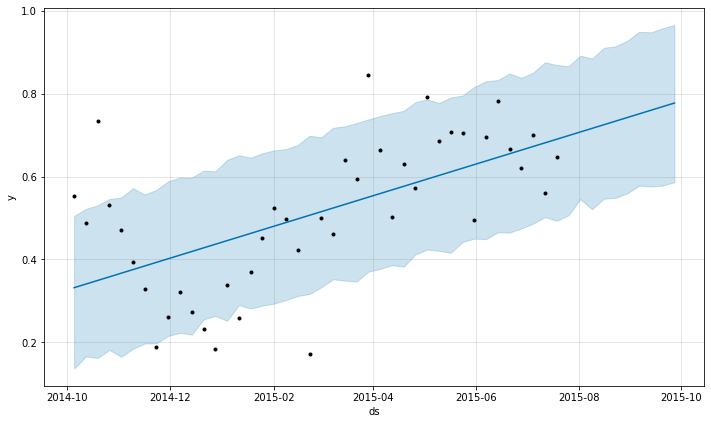

In [ ]:
fig1 =prophet_basic.plot(forecast)

Plotting the forecasted components

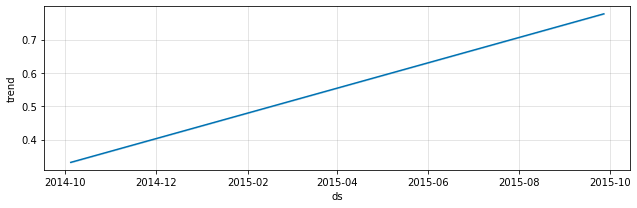

In [ ]:
fig1 = prophet_basic.plot_components(forecast)

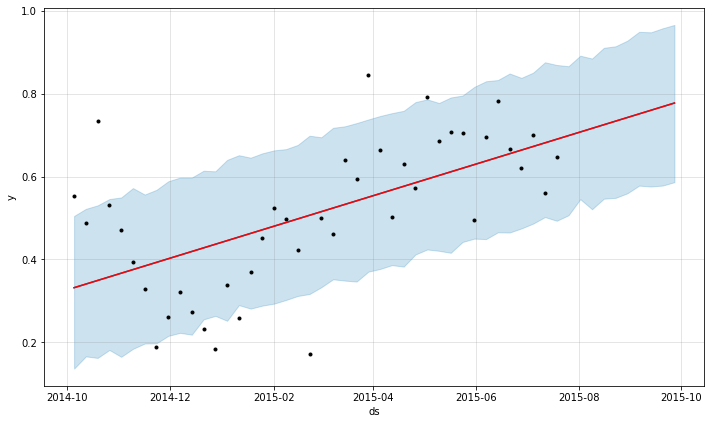

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)